In [2]:
# 1 les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# 2 Charger le fichier de données
df = pd.read_csv('donnees_maisons_T.csv')


In [3]:
# 3-1 Les 5 premier ligne
print(f"5 permier ligne du df : \n {df[ : 5]}")

# 3-2 les types de données de chaque colonne
print(f"Les types de données de chaque colone : \n{df.dtypes}")

# 3-2 Vérifier s'il y a des valeurs manquantes 
print(f"Valeurs manquantes : \n{df.isnull}")

5 permier ligne du df : 
      Quartier  Surface  Chambres  AnneeConstruction  DistanceCentreVille  \
0     Elhouda   174.91         4               2001              3045.02   
1    Taqaddom   290.14         4               1991              4260.18   
2  Almassira1   246.40         4               1998               581.90   
3     Elkasba   219.73         3               2011              4109.80   
4     Elkasba   131.20         4               1994              4761.03   

   QualiteQuartier               Adresse      Prix  
0                2  20 Rue C Béni Mellal  245023.0  
1                4          44 Rue D Fes  321516.0  
2                5        69 Rue B Rabat  129535.0  
3                2       78 Rue D Agadir  309495.0  
4                8       77 Rue A Tanger  325335.0  
Les types de données de chaque colone : 
Quartier                object
Surface                float64
Chambres                 int64
AnneeConstruction        int64
DistanceCentreVille    float64
Qua

In [4]:
# 3-4 Le nombre de caractéristiques (colonnes)
print(f"Nombre de colone : {df.shape[1]}")

# 3-5 Le nombre de caractéristiques (colonnes)
print(f"Nombre de ligne : {df.shape[0]}")

Nombre de colone : 8
Nombre de ligne : 5000


In [5]:
# 4 les statistiques descriptives pour les caractéristiques numériques
df.describe()

,Surface,Chambres,AnneeConstruction,DistanceCentreVille,QualiteQuartier,Prix
count,4991.000000,5000.000000,5000.000000,4991.000000,5000.000000,4500.000000
mean,199.363815,2.985600,2006.028400,2739.017243,5.004400,236256.672667
std,57.935070,0.816533,9.413018,1287.939257,2.557281,64757.225720
min,100.000000,2.000000,1990.000000,500.790000,1.000000,114327.000000
25%,148.935000,2.000000,1998.000000,1623.820000,3.000000,181083.500000
50%,199.780000,3.000000,2006.000000,2726.500000,5.000000,236044.000000
75%,249.625000,4.000000,2014.000000,3816.780000,7.000000,290747.750000
max,299.940000,4.000000,2022.000000,4999.520000,9.000000,358958.000000


(array([293., 486., 477., 516., 489., 508., 501., 457., 475., 298.]),
 array([114327. , 138790.1, 163253.2, 187716.3, 212179.4, 236642.5,
        261105.6, 285568.7, 310031.8, 334494.9, 358958. ]),
 <BarContainer object of 10 artists>)

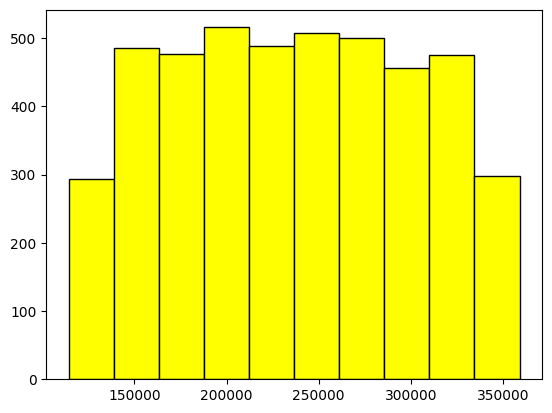

In [6]:
# 5 La distribution des prix des maisons en utilisant un histogramme
plt.hist(df["Prix"] , bins=10 , color="yellow" , edgecolor = 'black' , label='Distribution Prix')

In [7]:
# 6 la matrice de corrélation entre les caractéristiques numériques.
print(f"Matrice de corrélation : {df.corr(numeric_only = True)}")

Matrice de corrélation :                       Surface  Chambres  AnneeConstruction  \
Surface              1.000000  0.010449           0.000752   
Chambres             0.010449  1.000000          -0.001222   
AnneeConstruction    0.000752 -0.001222           1.000000   
DistanceCentreVille  0.035519 -0.018213           0.013154   
QualiteQuartier     -0.018375 -0.024590           0.011255   
Prix                 0.113083 -0.015644           0.016346   

                     DistanceCentreVille  QualiteQuartier      Prix  
Surface                         0.035519        -0.018375  0.113083  
Chambres                       -0.018213        -0.024590 -0.015644  
AnneeConstruction               0.013154         0.011255  0.016346  
DistanceCentreVille             1.000000         0.011824  0.995717  
QualiteQuartier                 0.011824         1.000000  0.015966  
Prix                            0.995717         0.015966  1.000000  


<Axes: >

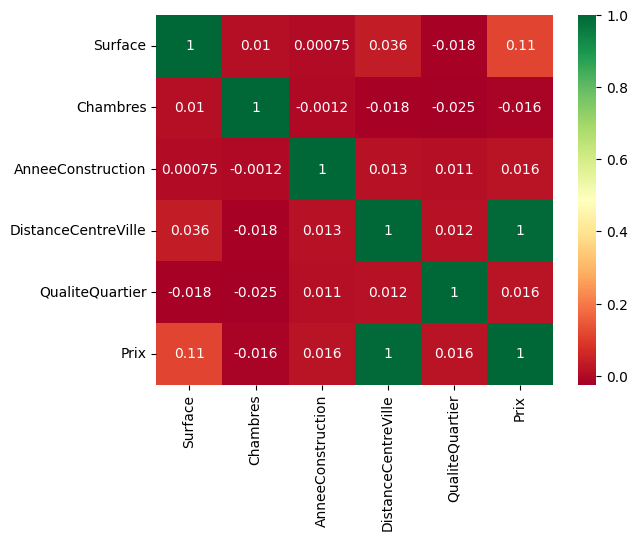

In [8]:
# 7 une heatmap de la matrice de corrélation
sb.heatmap(df.corr(numeric_only = True) , annot=True , cmap="RdYlGn")

Corrélation positive : Les variables Surface et Chambres sont positivement corrélées avec le Prix.
Corrélation négative : AnneeConstruction est négativement corrélée avec le Prix.
Variables indépendantes : DistanceCentreVille a une faible corrélation avec les autres variables.

In [9]:
# 8 Le décompte du nombre de maisons dans chaque quartier.
df.groupby("Quartier")["Quartier"].value_counts()

Quartier
Alatlas       638
Almassira1    624
Elhouda       637
Elkasba       613
Haycharaf     634
RiadSalam     632
Sisalem       629
Taqaddom      583
Name: count, dtype: int64

In [10]:
# 9 le prix moyen des maisons pour chaque quartier
df.groupby("Quartier")["Prix"].mean()

Quartier
Alatlas       234621.100694
Almassira1    240180.588542
Elhouda       234094.189895
Elkasba       239130.454206
Haycharaf     239779.487544
RiadSalam     234829.789381
Sisalem       233970.500000
Taqaddom      232806.571970
Name: Prix, dtype: float64

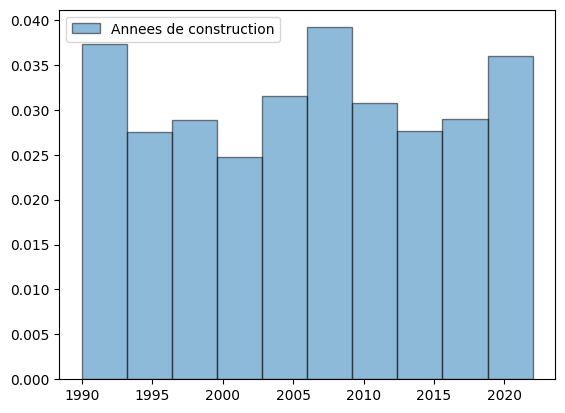

In [11]:
# 10 un histogramme de la répartition des années de construction 
plt.hist(df['AnneeConstruction'] , density = True , edgecolor = "black" , alpha = 0.5 , label = "Annees de construction")
plt.legend()

<Axes: xlabel='Chambres', ylabel='Prix'>

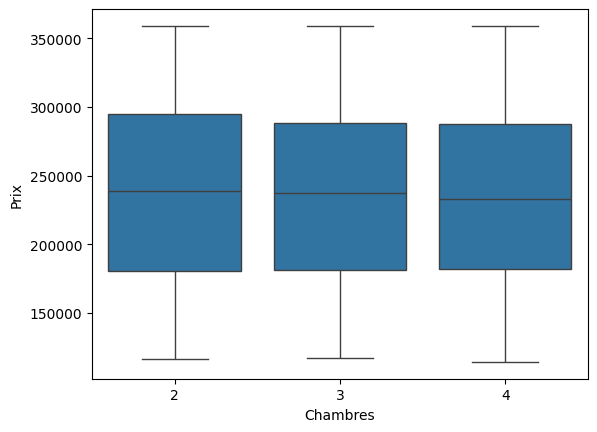

In [12]:
# 11 la variation du prix en fonction du nombre de chambres
# sb.boxplot(df.loc[:,["Prix" , "Chambres"]].var())
sb.boxplot(x=df["Chambres"] , y=df["Prix"] , data=df)

In [14]:
# 12 les données manquantes dans la colonne 'Prix' avec la moyenne
df["Prix"].isnull().sum().mean()

500.0

In [15]:
# 13 Les données manquantes dans les colonnes Surface et DistanceCentreVille avec la médiane
df.loc[:,["Surface" , "DistanceCentreVille"]].isnull().sum().median()

9.0

In [ ]:
# 14 Remplacer les données manquantes dans la colonne "Quartier" par la dernière valeur non manquante.
df["Quartier"].fillna(method="ffill" , inplace=True)

In [17]:
# 15 Supprimer les lignes contenant des données manquantes 
df.dropna(axis=0 , inplace=True)

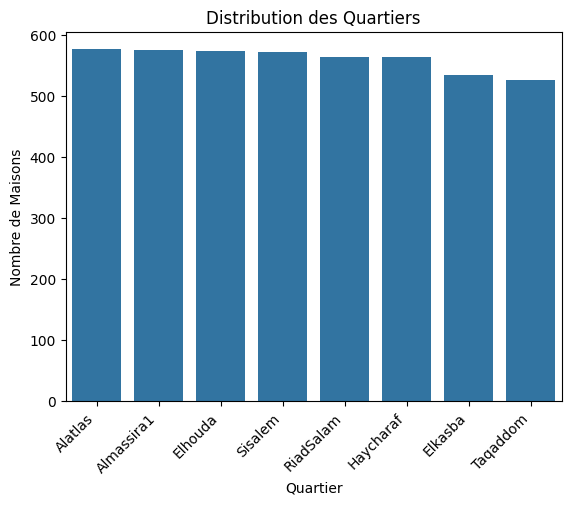

In [18]:
# 16 Visualiser la distribution des quartiers avec un diagramme en barres.
sb.countplot(x='Quartier', data=df, order=df['Quartier'].value_counts().index)
plt.xticks(rotation=45, ha='right')  
plt.title('Distribution des Quartiers')
plt.xlabel('Quartier')
plt.ylabel('Nombre de Maisons')
plt.show()

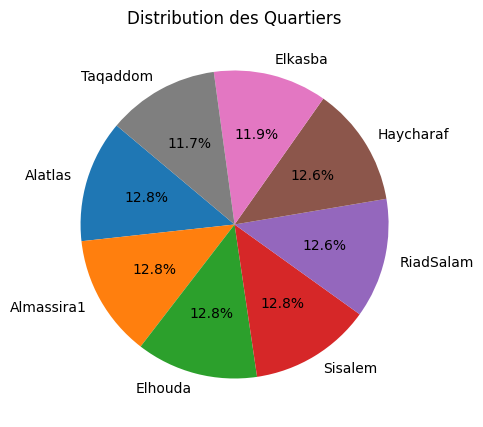

In [19]:
# 17 Visualiser la distribution des quartiers avec un diagramme en secteurs (pie chart).
distribution_quartiers = df['Quartier'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(distribution_quartiers, labels=distribution_quartiers.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des Quartiers')
plt.show()

In [20]:
# 18 Extraire les villes à partir des adresses en ajoutant une nouvelle colonne « Nom Ville ».
df['Nom Ville'] = df['Adresse'].str.extract(r"Rue\s\D\s([A-Za-z]+\D[A-Za-z]+)")
df

,Quartier,Surface,Chambres,AnneeConstruction,DistanceCentreVille,QualiteQuartier,Adresse,Prix,Nom Ville
0,Elhouda,174.91,4,2001,3045.02,2,20 Rue C Béni Mellal,245023.0,Béni
1,Taqaddom,290.14,4,1991,4260.18,4,44 Rue D Fes,321516.0,Fes
2,Almassira1,246.40,4,1998,581.90,5,69 Rue B Rabat,129535.0,Rabat
3,Elkasba,219.73,3,2011,4109.80,2,78 Rue D Agadir,309495.0,Agadir
4,Elkasba,131.20,4,1994,4761.03,8,77 Rue A Tanger,325335.0,Tanger
...,...,...,...,...,...,...,...,...,...
4994,Haycharaf,113.69,2,1992,1913.08,7,28 Rue A Agadir,193557.0,Agadir
4995,Taqaddom,279.48,3,1993,2716.12,5,99 Rue B Tanger,244567.0,Tanger
4997,Haycharaf,165.57,2,2009,3700.05,3,56 Rue E Rabat,279295.0,Rabat
4998,Haycharaf,263.15,2,2004,2913.39,2,24 Rue D Rabat,249519.0,Rabat


In [21]:
# 19 Supprimer les espaces de début de chaque valeur dans la colonne Nom Ville
df['Nom Ville'] = df['Nom Ville'].str.strip()
df

,Quartier,Surface,Chambres,AnneeConstruction,DistanceCentreVille,QualiteQuartier,Adresse,Prix,Nom Ville
0,Elhouda,174.91,4,2001,3045.02,2,20 Rue C Béni Mellal,245023.0,Béni
1,Taqaddom,290.14,4,1991,4260.18,4,44 Rue D Fes,321516.0,Fes
2,Almassira1,246.40,4,1998,581.90,5,69 Rue B Rabat,129535.0,Rabat
3,Elkasba,219.73,3,2011,4109.80,2,78 Rue D Agadir,309495.0,Agadir
4,Elkasba,131.20,4,1994,4761.03,8,77 Rue A Tanger,325335.0,Tanger
...,...,...,...,...,...,...,...,...,...
4994,Haycharaf,113.69,2,1992,1913.08,7,28 Rue A Agadir,193557.0,Agadir
4995,Taqaddom,279.48,3,1993,2716.12,5,99 Rue B Tanger,244567.0,Tanger
4997,Haycharaf,165.57,2,2009,3700.05,3,56 Rue E Rabat,279295.0,Rabat
4998,Haycharaf,263.15,2,2004,2913.39,2,24 Rue D Rabat,249519.0,Rabat


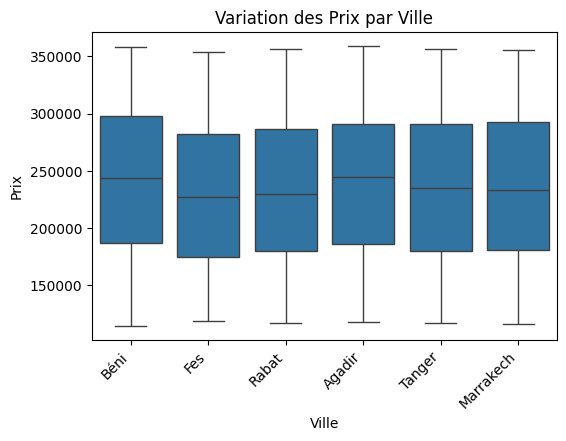

In [22]:
# 20 Visualiser les prix par ville avec une boîte à moustaches
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')

plt.figure(figsize=(6, 4))
sb.boxplot(x='Nom Ville', y='Prix', data=df)
plt.xticks(rotation=45, ha='right')  
plt.title('Variation des Prix par Ville')
plt.xlabel('Ville')
plt.ylabel('Prix')
plt.show()

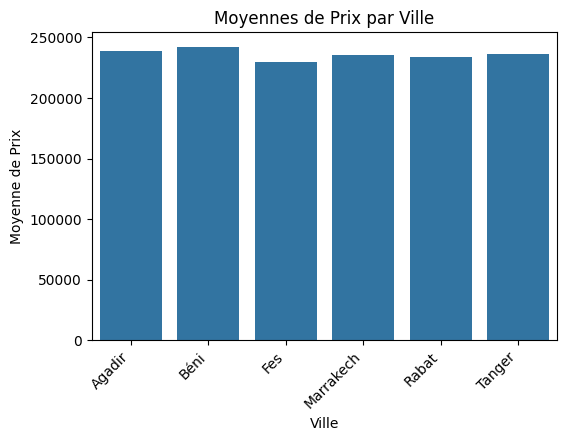

In [23]:
# 21 Visualiser les moyennes de prix par ville avec un diagramme en barres
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
moyennes_prix_par_ville = df.groupby('Nom Ville')['Prix'].mean().reset_index()
plt.figure(figsize=(6, 4))
sb.barplot(x='Nom Ville', y='Prix', data=moyennes_prix_par_ville)
plt.xticks(rotation=45, ha='right')
plt.title('Moyennes de Prix par Ville')
plt.xlabel('Ville')
plt.ylabel('Moyenne de Prix')
plt.show()

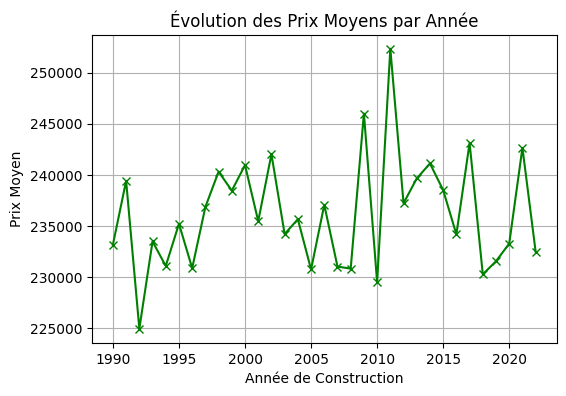

In [24]:
# 22 Analyser comment les prix évoluent au fil des années avec un diagramme en ligne.
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
df['AnneeConstruction'] = pd.to_numeric(df['AnneeConstruction'], errors='coerce')

moyennes_prix_par_annee = df.groupby('AnneeConstruction')['Prix'].mean().reset_index()
moyennes_prix_par_annee = moyennes_prix_par_annee.sort_values(by='AnneeConstruction')

plt.figure(figsize=(6, 4))
plt.plot(moyennes_prix_par_annee['AnneeConstruction'], moyennes_prix_par_annee['Prix'],
        marker='x', color='green', linestyle='-')
plt.title('Évolution des Prix Moyens par Année')
plt.xlabel('Année de Construction')
plt.ylabel('Prix Moyen')
plt.grid(True)
plt.show()

In [25]:
df.to_csv('TP6.csv', index=False)